In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as stats

In [36]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics2.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics2.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
state_data = pd.read_csv('../data/state_data.csv', index_col=False)
sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)
tweets_with_topics = pd.read_csv('../data/tweet_data/tweets_with_topics.csv', index_col=False)
tweets_with_topics = tweets_with_topics.rename(index=str, columns={"tweet_idx": "tweet_id"})

dem_df['sentiment'] = dem_df['sentiment']
rep_df['sentiment'] = rep_df['sentiment']

dem_df = dem_df.merge(state_data, on=['state'], how='left')
rep_df = rep_df.merge(state_data, on=['state'], how='left')

print(str(len(dem_df[dem_df['sentiment'].isna() == True])) + " : " + str(len(dem_df)))
print(str(len(rep_df[rep_df['sentiment'].isna() == True])) + " : " + str(len(rep_df)))


149 : 767
266 : 695


In [37]:
sa_tweet_topics = sa_all_tweets[['tweet_id'
                                 , 'twitter_handle'
                                 , 'sentiment'
                                 , 'neg_prob'
                                 , 'neutral_prob'
                                 , 'pos_prob']].merge(tweets_with_topics, on = ['tweet_id'])

In [38]:
sa_tweet_topics.columns

Index(['tweet_id', 'twitter_handle', 'sentiment', 'neg_prob', 'neutral_prob',
       'pos_prob', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump'],
      dtype='object')

In [39]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [40]:
# add topic sentiment
topics = ['gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump']

def add_topic_sentiment(df, tweet_df, topic):
    score = None
    sent_scores = []
    for i, r in df.iterrows():
        if i % 100 == 0:
            print("{} / {}".format(i, len(df)))
        score = None
        if type(r['twitter_handle']) == str:
            score = tweet_df[(tweet_df['twitter_handle'] == r['twitter_handle']) & (tweet_df[topic] == 1)].sentiment.mean()
        if type(r['twitter_handle2']) == str:
            score += tweet_df[(tweet_df['twitter_handle'] == r['twitter_handle2']) & (tweet_df[topic] == 1)].sentiment.mean()
            score = score / 2
        
        sent_scores.append(score)
    df['{}_sentiment'.format(topic)] = sent_scores

## NOTE: topic sentiments are in dataset ending in '2'
    
# for t in topics:
#     print(t)
#     if '{}_sentiment'.format(t) not in dem_df.columns:
#         print('dem')
#         add_topic_sentiment(dem_df, sa_tweet_topics, t)
    
#     if '{}_sentiment'.format(t) not in rep_df.columns:
#         print('rep')
#         add_topic_sentiment(rep_df, sa_tweet_topics, t)
                               

In [41]:
dem_df.head(5)

,candidate,twitter_handle,twitter_handle2,state,district,office_type,race_type,race_primary_election_date,primary_status,primary_runoff_status,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Anthony White (Alabama),NaN,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
1,Christopher Countryman,CA_Countryman,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
2,"Doug ""New Blue"" Smith",sdoug_smith,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
3,James C. Fields,jamesfields_al,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
4,Sue Bell Cobb,SueBellCobb,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605


In [42]:
# rep_df.to_csv('../data/post_rep_candidates_with_tweet_topics2.csv', index=False)
# dem_df.to_csv('../data/post_dem_candidates_with_tweet_topics2.csv', index=False)

In [43]:
dem_df[['num_tweets', 'count_negative', 'count_positive', 'sentiment']].head(2)

,num_tweets,count_negative,count_positive,sentiment
0,0,0,0,NaN
1,614,141,225,0.229642


In [44]:
dem_df.head(3)

,candidate,twitter_handle,twitter_handle2,state,district,office_type,race_type,race_primary_election_date,primary_status,primary_runoff_status,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Anthony White (Alabama),NaN,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
1,Christopher Countryman,CA_Countryman,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605
2,"Doug ""New Blue"" Smith",sdoug_smith,NaN,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,...,51.274657,37.864079,16.930066,38834.925373,10.103144,19.149822,83.08087,15.425409,80.153599,67.08605


In [45]:
print(len(dem_df[dem_df['sentiment'] > 0]) / len(dem_df))
print(len(dem_df[dem_df['sentiment'] > 0]))

0.7835723598435462
601


/Users/katieta/tf/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/katieta/tf/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([array([ 77., 241., 196.,  77.,  18.,   7.,   0.,   0.,   1.,   1.]),
  array([ 68., 241., 196.,  76.,  18.,   6.,   0.,   0.,   1.,   0.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

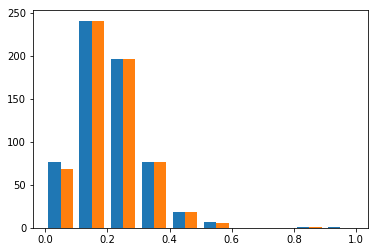

In [46]:
fig, axs = plt.subplots(1)
a = dem_df[dem_df['num_tweets'] >= 0].sentiment
b = dem_df[dem_df['num_tweets'] >= 5].sentiment
axs.hist([a, b])

/Users/katieta/tf/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/katieta/tf/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([array([ 56., 100.,  63.,  86.,  55.,  35.,  13.,  12.,   1.,   8.]),
  array([ 44., 100.,  63.,  86.,  55.,  35.,  13.,  12.,   1.,   4.])],
 array([0.        , 0.05527137, 0.11054273, 0.1658141 , 0.22108546,
        0.27635683, 0.3316282 , 0.38689956, 0.44217093, 0.4974423 ,
        0.55271366]),
 <a list of 2 Lists of Patches objects>)

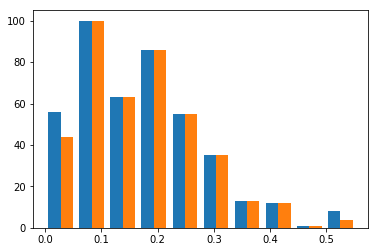

In [47]:
fig, axs = plt.subplots(1)
a = rep_df[rep_df['num_tweets'] >= 0].sentiment
b = rep_df[rep_df['num_tweets'] >= 5].sentiment
axs.hist([a, b])

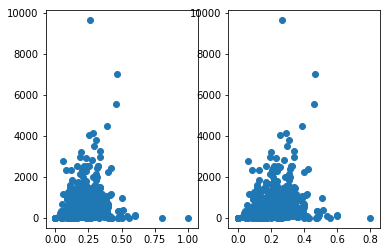

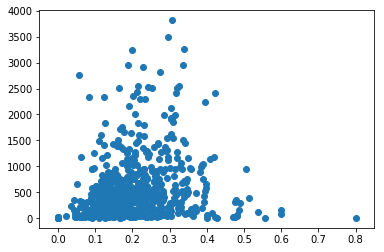

In [48]:
fig, (axs1, axs2) = plt.subplots(1, 2)
t_dem_df = dem_df[dem_df['num_tweets'] >= 0]
x, y = t_dem_df['sentiment'], t_dem_df['num_tweets']
axs1.scatter(x, y)
t_dem_df = dem_df[dem_df['num_tweets'] >= 5]
x, y = t_dem_df['sentiment'], t_dem_df['num_tweets']
axs2.scatter(x, y)

dem_df = dem_df[(dem_df['num_tweets'] >= 5) & (dem_df['num_tweets'] <= 4000)]

fig, axs = plt.subplots(1)
x, y = dem_df['sentiment'], dem_df['num_tweets']
axs.scatter(x, y)

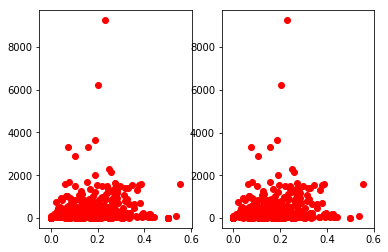

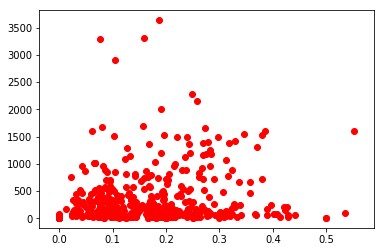

In [49]:
fig, (axs1, axs2) = plt.subplots(1, 2)
t_rep_df = rep_df[rep_df['num_tweets'] >= 0]
x, y = t_rep_df['sentiment'], t_rep_df['num_tweets']
axs1.scatter(x, y, c='red')
t_rep_df = rep_df[rep_df['num_tweets'] >= 5]
x, y = t_rep_df['sentiment'], t_rep_df['num_tweets']
axs2.scatter(x, y, c='red')

rep_df = rep_df[(rep_df['num_tweets'] >= 5) & (rep_df['num_tweets'] <= 5000)]

fig, axs = plt.subplots(1)
x, y = rep_df['sentiment'], rep_df['num_tweets']
axs.scatter(x, y, c='red')

# Number of Tweets to Result

##### Below we can see how the number of tweets corresponds to the result

In [51]:
rep_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'primary_pctg', 'won_primary', 'rep_party_support', 'trump_endorsed',
       'bannon_endorsed', 'great_america_endorsed', 'nra_endorsed',
       'right_to_life_endorsed', 'susan_b_anthony_endorsed',
       'club_for_growth_endorsed', 'koch_support', 'house_freedom_support',
       'tea_party_endorsed', 'main_street_endorsed', 'chamber_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet_count', 'gender_tweet_count', 'women_tweet_count',
       'lgbt_twee

([array([65., 31., 15.,  5.,  4.,  1.,  0.,  0.,  0.,  3.]),
  array([214.,  33.,  17.,  11.,   9.,   1.,   1.,   0.,   1.,   0.])],
 array([   5. ,  368.2,  731.4, 1094.6, 1457.8, 1821. , 2184.2, 2547.4,
        2910.6, 3273.8, 3637. ]),
 <a list of 2 Lists of Patches objects>)

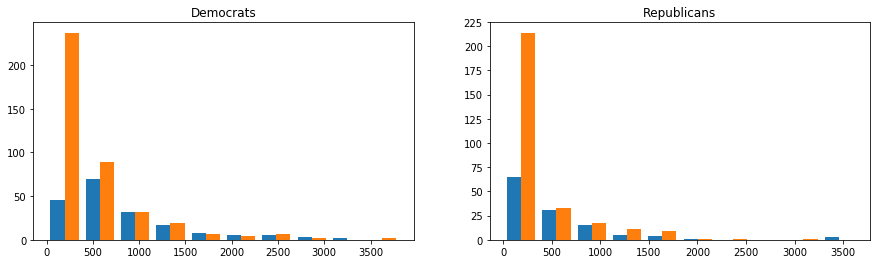

In [50]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
no = dem_df[dem_df['won_primary'] == 'No'].num_tweets
yes = dem_df[dem_df['won_primary'] == 'Yes'].num_tweets
axs1.set_title("Democrats")
axs1.hist([yes, no])

no = rep_df[rep_df['won_primary'] == 'No'].num_tweets
yes = rep_df[rep_df['won_primary'] == 'Yes'].num_tweets
axs2.set_title("Republicans")
axs2.hist([yes, no])

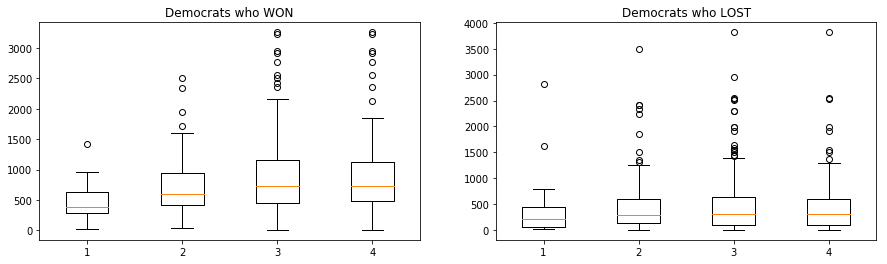

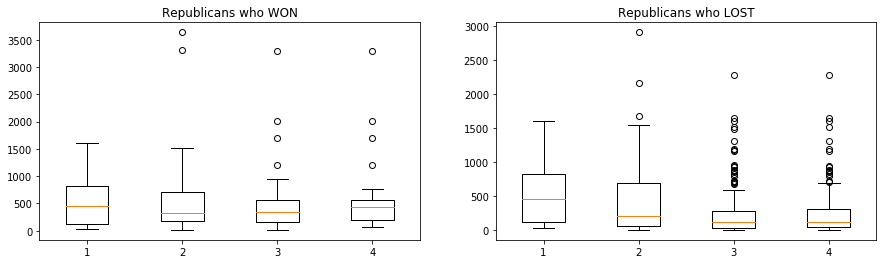

In [121]:
# LOOKing at NUM TWEETs & AGE 25 and YOUNGER

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats who WON")
d14_16 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age29andunder_pct'] >= 32) & (dem_df['age29andunder_pct'] < 35)].num_tweets
d16_17 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age29andunder_pct'] >= 35) & (dem_df['age29andunder_pct'] < 37)].num_tweets
d17_18 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age29andunder_pct'] >= 37) & (dem_df['age29andunder_pct'] < 40)].num_tweets
d18_20 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age29andunder_pct'] >= 38) & (dem_df['age29andunder_pct'] < 45)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs1.boxplot(data)

axs2.set_title("Democrats who LOST")
d14_16 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age29andunder_pct'] >= 32) & (dem_df['age29andunder_pct'] < 35)].num_tweets
d16_17 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age29andunder_pct'] >= 35) & (dem_df['age29andunder_pct'] < 37)].num_tweets
d17_18 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age29andunder_pct'] >= 37) & (dem_df['age29andunder_pct'] < 40)].num_tweets
d18_20 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age29andunder_pct'] >= 38) & (dem_df['age29andunder_pct'] < 45)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs2.boxplot(data)

# LOOKing at AGE 65 and OLDER

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Republicans who WON")
d14_16 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age29andunder_pct'] >= 32) & (rep_df['age29andunder_pct'] < 35)].num_tweets
d16_17 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age29andunder_pct'] >= 35) & (rep_df['age29andunder_pct'] < 37)].num_tweets
d17_18 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age29andunder_pct'] >= 37) & (rep_df['age29andunder_pct'] < 40)].num_tweets
d18_20 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age29andunder_pct'] >= 38) & (rep_df['age29andunder_pct'] < 45)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs1.boxplot(data)

axs2.set_title("Republicans who LOST")
d14_16 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age29andunder_pct'] >= 32) & (rep_df['age29andunder_pct'] < 35)].num_tweets
d16_17 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age29andunder_pct'] >= 35) & (rep_df['age29andunder_pct'] < 37)].num_tweets
d17_18 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age29andunder_pct'] >= 37) & (rep_df['age29andunder_pct'] < 40)].num_tweets
d18_20 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age29andunder_pct'] >= 38) & (rep_df['age29andunder_pct'] < 45)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs2.boxplot(data)



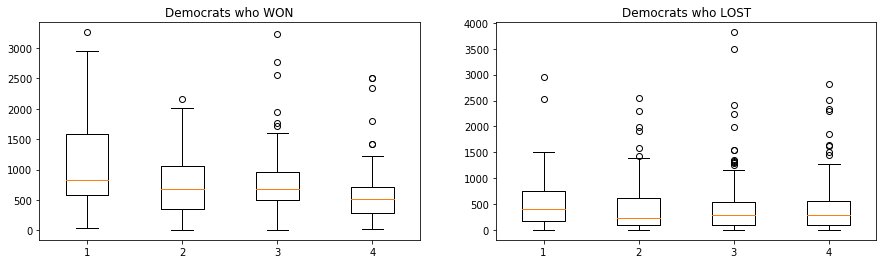

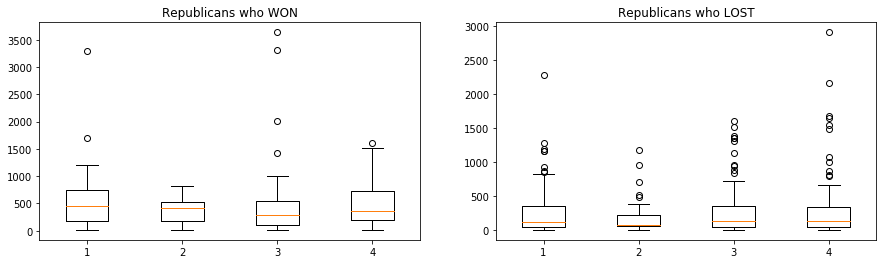

In [108]:
# LOOKing at NUM_TWEETS & AGE 65 and OLDER

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats who WON")
d14_16 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age65andolder_pct'] >= 14) & (dem_df['age65andolder_pct'] < 16)].num_tweets
d16_17 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age65andolder_pct'] >= 16) & (dem_df['age65andolder_pct'] < 17)].num_tweets
d17_18 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age65andolder_pct'] >= 17) & (dem_df['age65andolder_pct'] < 18)].num_tweets
d18_20 = dem_df[(dem_df['won_primary'] == 'Yes') & (dem_df['age65andolder_pct'] >= 18) & (dem_df['age65andolder_pct'] < 20)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs1.boxplot(data)

axs2.set_title("Democrats who LOST")
d14_16 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age65andolder_pct'] >= 14) & (dem_df['age65andolder_pct'] < 16)].num_tweets
d16_17 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age65andolder_pct'] >= 16) & (dem_df['age65andolder_pct'] < 17)].num_tweets
d17_18 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age65andolder_pct'] >= 17) & (dem_df['age65andolder_pct'] < 18)].num_tweets
d18_20 = dem_df[(dem_df['won_primary'] == 'No') & (dem_df['age65andolder_pct'] >= 18) & (dem_df['age65andolder_pct'] < 20)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs2.boxplot(data)

# LOOKing at AGE 65 and OLDER

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Republicans who WON")
d14_16 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age65andolder_pct'] >= 14) & (rep_df['age65andolder_pct'] < 16)].num_tweets
d16_17 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age65andolder_pct'] >= 16) & (rep_df['age65andolder_pct'] < 17)].num_tweets
d17_18 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age65andolder_pct'] >= 17) & (rep_df['age65andolder_pct'] < 18)].num_tweets
d18_20 = rep_df[(rep_df['won_primary'] == 'Yes') & (rep_df['age65andolder_pct'] >= 18) & (rep_df['age65andolder_pct'] < 20)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs1.boxplot(data)

axs2.set_title("Republicans who LOST")
d14_16 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age65andolder_pct'] >= 14) & (rep_df['age65andolder_pct'] < 16)].num_tweets
d16_17 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age65andolder_pct'] >= 16) & (rep_df['age65andolder_pct'] < 17)].num_tweets
d17_18 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age65andolder_pct'] >= 17) & (rep_df['age65andolder_pct'] < 18)].num_tweets
d18_20 = rep_df[(rep_df['won_primary'] == 'No') & (rep_df['age65andolder_pct'] >= 18) & (rep_df['age65andolder_pct'] < 20)].num_tweets

data = [d14_16, d16_17, d17_18, d18_20]
_ = axs2.boxplot(data)



([array([ 9., 44., 28., 21., 14.,  6.,  1.,  1.,  0.,  0.]),
  array([35., 56., 35., 64., 40., 29., 12., 11.,  1.,  4.])],
 array([0.        , 0.05527137, 0.11054273, 0.1658141 , 0.22108546,
        0.27635683, 0.3316282 , 0.38689956, 0.44217093, 0.4974423 ,
        0.55271366]),
 <a list of 2 Lists of Patches objects>)

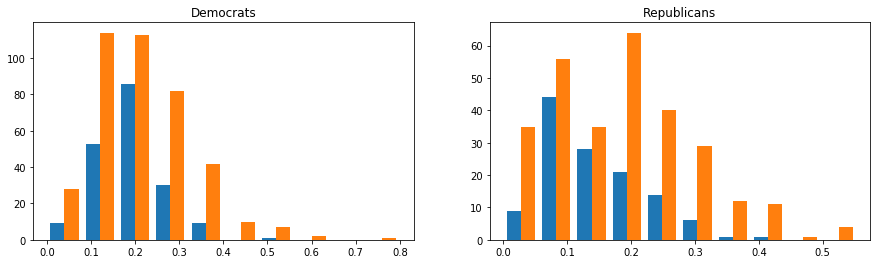

In [34]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
no = dem_df[dem_df['won_primary'] == 'No'].sentiment
yes = dem_df[dem_df['won_primary'] == 'Yes'].sentiment
axs1.set_title("Democrats")
axs1.hist([yes, no])

no = rep_df[rep_df['won_primary'] == 'No'].sentiment
yes = rep_df[rep_df['won_primary'] == 'Yes'].sentiment
axs2.set_title("Republicans")
axs2.hist([yes, no])

([array([59., 45., 11.,  1.,  3.,  2.,  0.,  0.,  1.,  2.]),
  array([97., 14.,  9.,  1.,  2.,  1.,  0.,  0.,  0.,  0.]),
  array([108.,  13.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([   0. ,  204.6,  409.2,  613.8,  818.4, 1023. , 1227.6, 1432.2,
        1636.8, 1841.4, 2046. ]),
 <a list of 3 Lists of Patches objects>)

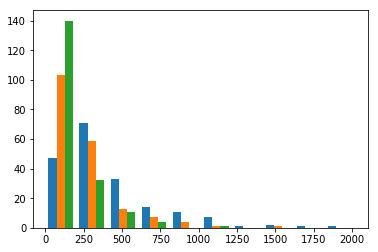

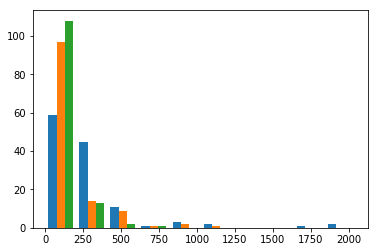

In [35]:
fig, axs = plt.subplots(1)
pos = dem_df[dem_df['won_primary'] == 'Yes'].count_positive
neutral = dem_df[dem_df['won_primary'] == 'Yes'].count_neutral
neg = dem_df[dem_df['won_primary'] == 'Yes'].count_negative

axs.hist([pos, neutral, neg])


fig, axs = plt.subplots(1)
pos = rep_df[rep_df['won_primary'] == 'Yes'].count_positive
neutral = rep_df[rep_df['won_primary'] == 'Yes'].count_neutral
neg = rep_df[rep_df['won_primary'] == 'Yes'].count_negative

axs.hist([pos, neutral, neg])


In [21]:
won_primary_dem_df = dem_df[dem_df['won_primary'] == "Yes"]
won_primary_rep_df = rep_df[rep_df['won_primary'] == "Yes"]
lost_primary_dem_df = dem_df[dem_df['won_primary'] == "No"]
lost_primary_rep_df = rep_df[rep_df['won_primary'] == "No"]

(array([354., 127.,  46.,  30.,  15.,  12.,   6.,   2.,   3.,   1.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

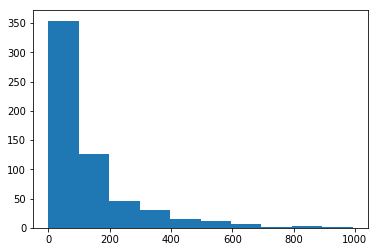

In [22]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_negative'] < 1000].count_negative)

(array([260., 141.,  83.,  46.,  23.,  11.,   8.,   8.,   5.,   5.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

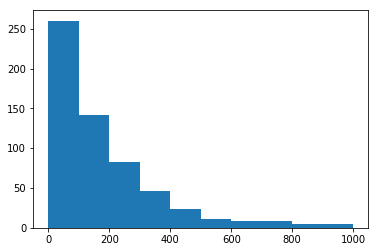

In [23]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_neutral'] < 1000].count_neutral)

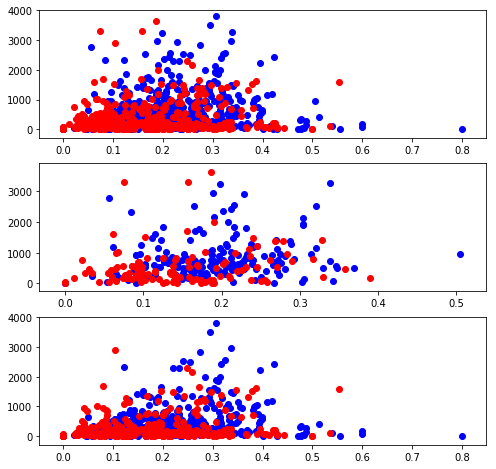

In [87]:
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=(8, 8))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['num_tweets'], rep_df['sentiment'], rep_df['num_tweets']
axs1.scatter(d1, d2, c='blue')
axs1.scatter(r1, r2, c='red')

wd1, wd2, wr1, wr2 = won_primary_dem_df['sentiment'], won_primary_dem_df['num_tweets'], won_primary_rep_df['sentiment'], won_primary_rep_df['num_tweets']
axs2.scatter(wd1, wd2, c='blue')
axs2.scatter(wr1, wr2, c='red')

ld1, ld2, lr1, lr2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['num_tweets'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['num_tweets']
axs3.scatter(ld1, ld2, c='blue')
axs3.scatter(lr1, lr2, c='red')

# Candidate Sentiment vs Number of Endorsements

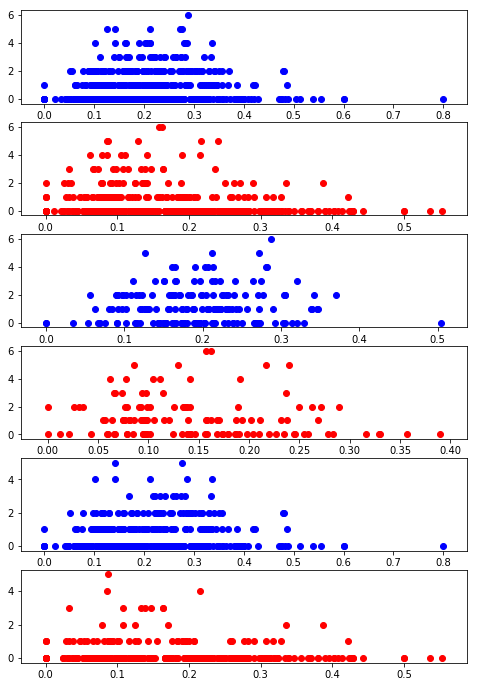

In [88]:
fig, (axs1, axs2, axs3, axs4, axs5, axs6) = plt.subplots(6, 1, figsize=(8, 12))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['num_endorsements'], rep_df['sentiment'], rep_df['num_endorsements']
axs1.scatter(d1, d2, c='blue')
axs2.scatter(r1, r2, c='red')

wd1, wd2, wr1, wr2 = won_primary_dem_df['sentiment'], won_primary_dem_df['num_endorsements'], won_primary_rep_df['sentiment'], won_primary_rep_df['num_endorsements']
axs3.scatter(wd1, wd2, c='blue')
axs4.scatter(wr1, wr2, c='red')

ld1, ld2, lr1, lr2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['num_endorsements'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['num_endorsements']
axs5.scatter(ld1, ld2, c='blue')
axs6.scatter(lr1, lr2, c='red')

# Candidate Sentiment vs Number of Gun Control Tweets

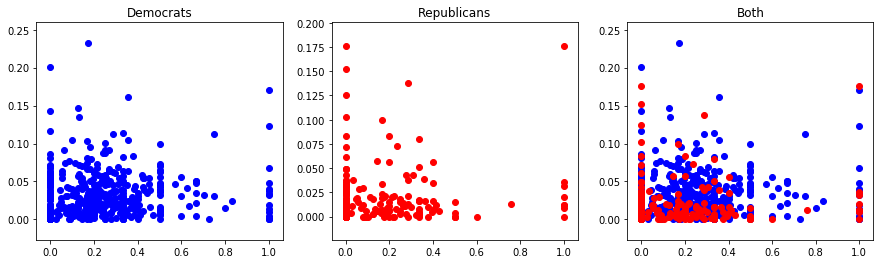

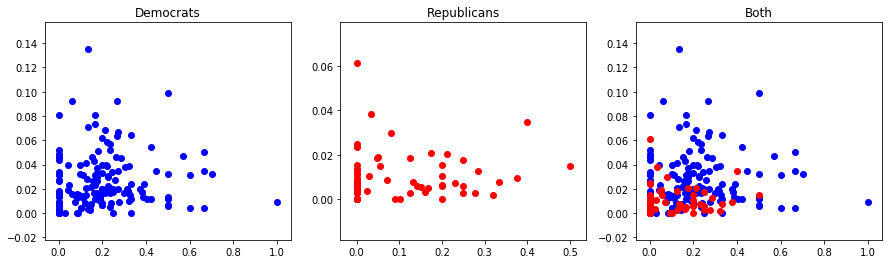

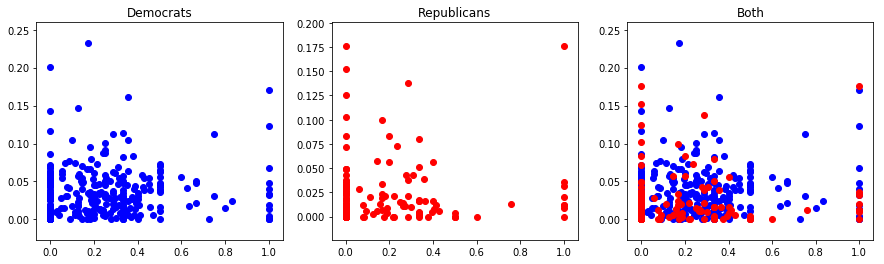

In [89]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
# tdf1, trf1 = dem_df[dem_df['gun_control_tweet_count'] >= 1], rep_df[rep_df['gun_control_tweet_count'] >= 1]
d1, d2, r1, r2 = dem_df['gun_control_sentiment'], (dem_df['gun_control_tweet_count'] / dem_df['num_tweets']), rep_df['gun_control_sentiment'], (rep_df['gun_control_tweet_count'] / rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['gun_control_sentiment'], (won_primary_dem_df['gun_control_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['gun_control_sentiment'], (won_primary_rep_df['gun_control_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['gun_control_sentiment'], (lost_primary_dem_df['gun_control_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['gun_control_sentiment'], (lost_primary_rep_df['gun_control_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([94., 18.,  6.,  3.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.01612903, 0.03225806, 0.0483871 , 0.06451613,
        0.08064516, 0.09677419, 0.11290323, 0.12903226, 0.14516129,
        0.16129032]),
 <a list of 10 Patch objects>)

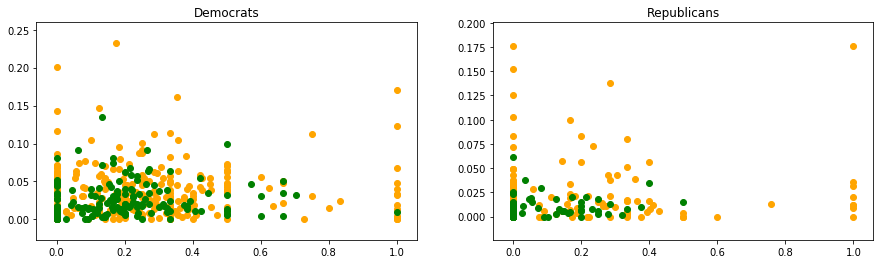

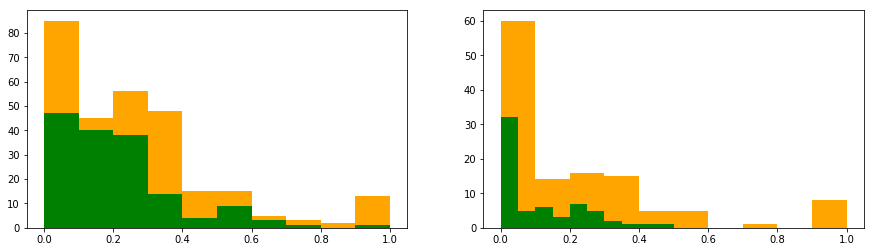

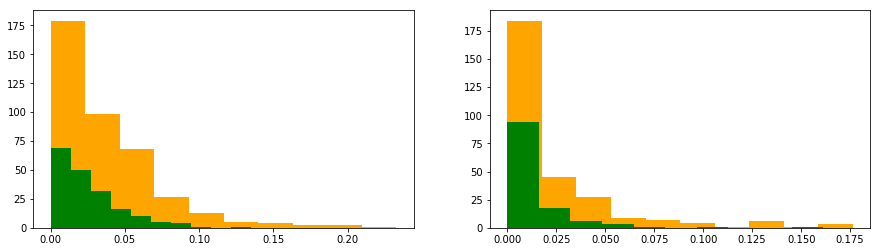

In [92]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

ld = lost_primary_dem_df[lost_primary_dem_df['gun_control_tweet_count'] < 400]
lr = lost_primary_rep_df[lost_primary_rep_df['gun_control_tweet_count'] < 400]
l_d1, l_d2, l_r1, l_r2 = ld['gun_control_sentiment'], (ld['gun_control_tweet_count'] / ld['num_tweets']), lr['gun_control_sentiment'], (lr['gun_control_tweet_count'] / lr['num_tweets'])
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

wd = won_primary_dem_df[won_primary_dem_df['gun_control_tweet_count'] < 400]
wr = won_primary_rep_df[won_primary_rep_df['gun_control_tweet_count'] < 400]
w_d1, w_d2, w_r1, w_r2 = wd['gun_control_sentiment'], (wd['gun_control_tweet_count'] / wd['num_tweets']), wr['gun_control_sentiment'], (wr['gun_control_tweet_count'] / wr['num_tweets'])
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(l_d1, color='orange')
axs2.hist(l_r1, color='orange')
axs1.hist(w_d1, color='green')
axs2.hist(w_r1, color='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(l_d2, color='orange')
axs2.hist(l_r2, color='orange')
axs1.hist(w_d2, color='green')
axs2.hist(w_r2, color='green')


In [93]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-2.5590127168011443, 0.010496990144633614)
sentiment republicans – won vs loss: (-2.8363189300328706, 0.004563684794793084)
sentiment both – won:                (3.835862346698442, 0.0001251244788280658)
sentiment both – loss:               (1.7975691737773196, 0.07224530702059281)

ratio democrats – won vs loss:       (-3.3838997084448224, 0.0007146410229705754)
ratio republicans – won vs loss:     (-2.554383848614647, 0.010637591441195887)
ratio both – won:                    (4.66285367016673, 3.118545039481397e-06)
ratio both – loss:                   (5.047581669116217, 4.4743752525088863e-07)


# Sentiment vs Number of Health Care Tweets

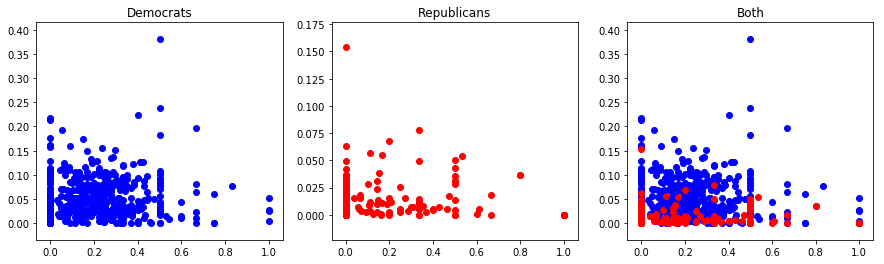

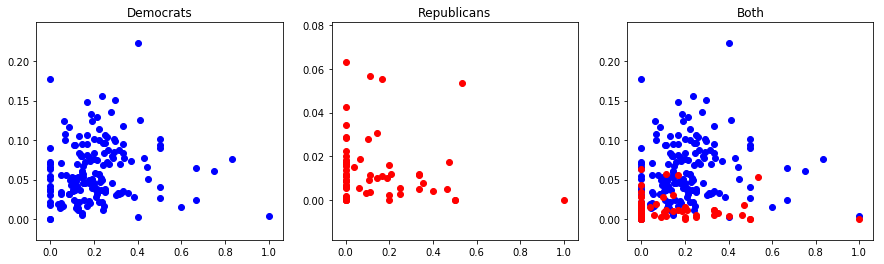

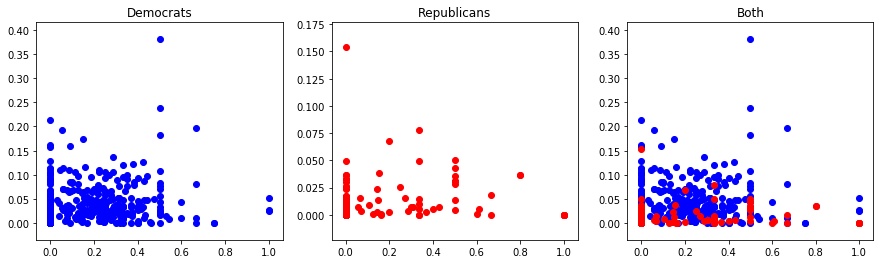

In [94]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['health_care_sentiment'], (dem_df['health_care_tweet_count'] / dem_df['num_tweets']), rep_df['health_care_sentiment'], (rep_df['health_care_tweet_count'] / rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['health_care_sentiment'], (won_primary_dem_df['health_care_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['health_care_sentiment'], (won_primary_rep_df['health_care_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['health_care_sentiment'], (lost_primary_dem_df['health_care_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['health_care_sentiment'], (lost_primary_rep_df['health_care_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

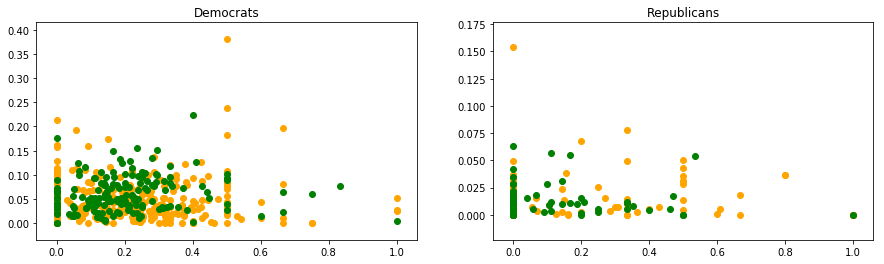

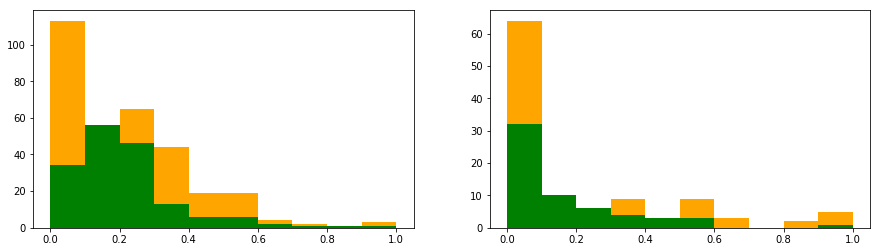

In [96]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

ld = lost_primary_dem_df[lost_primary_dem_df['health_care_tweet_count'] < 400]
lr = lost_primary_rep_df[lost_primary_rep_df['health_care_tweet_count'] < 400]
l_d1, l_d2, l_r1, l_r2 = ld['health_care_sentiment'], (ld['health_care_tweet_count'] / ld['num_tweets']), lr['health_care_sentiment'], (lr['health_care_tweet_count'] / lr['num_tweets'])
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

wd = won_primary_dem_df[won_primary_dem_df['health_care_tweet_count'] < 400]
wr = won_primary_rep_df[won_primary_rep_df['health_care_tweet_count'] < 400]
w_d1, w_d2, w_r1, w_r2 = wd['health_care_sentiment'], (wd['health_care_tweet_count'] / wd['num_tweets']), wr['health_care_sentiment'], (wr['health_care_tweet_count'] / wr['num_tweets'])
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(l_d1, color='orange')
axs2.hist(l_r1, color='orange')
axs1.hist(w_d1, color='green')
axs2.hist(w_r1, color='green')


In [97]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (0.11851624367132511, 0.9056586252135699)
sentiment republicans – won vs loss: (-1.1246438248836834, 0.2607399948910478)
sentiment both – won:                (2.6396430380918012, 0.008299339215759101)
sentiment both – loss:               (0.8578247373873575, 0.39098924797200807)

ratio democrats – won vs loss:       (2.7291695123645723, 0.006349405644263188)
ratio republicans – won vs loss:     (2.930471424741354, 0.003384481197765815)
ratio both – won:                    (11.145268421601772, 7.551624494721898e-29)
ratio both – loss:                   (10.647127498505206, 1.798286310183446e-26)


# Candidate Sentiment vs Number of Abortion Tweets

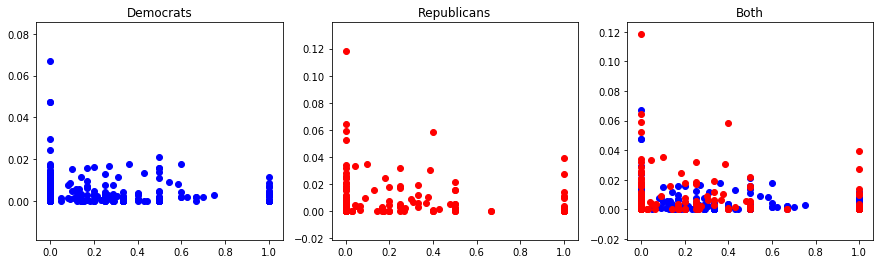

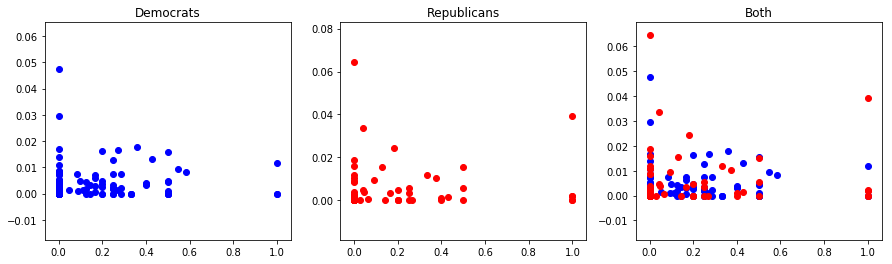

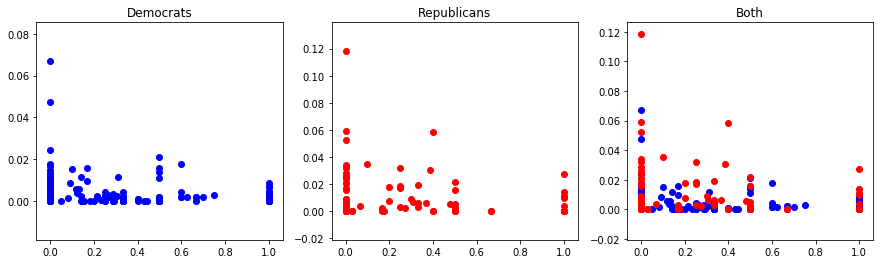

In [98]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['abortion_sentiment'], (dem_df['abortion_tweet_count'] / dem_df['num_tweets']), rep_df['abortion_sentiment'], (rep_df['abortion_tweet_count'] / rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['abortion_sentiment'], (won_primary_dem_df['abortion_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['abortion_sentiment'], (won_primary_rep_df['abortion_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['abortion_sentiment'], (lost_primary_dem_df['abortion_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['abortion_sentiment'], (lost_primary_rep_df['abortion_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

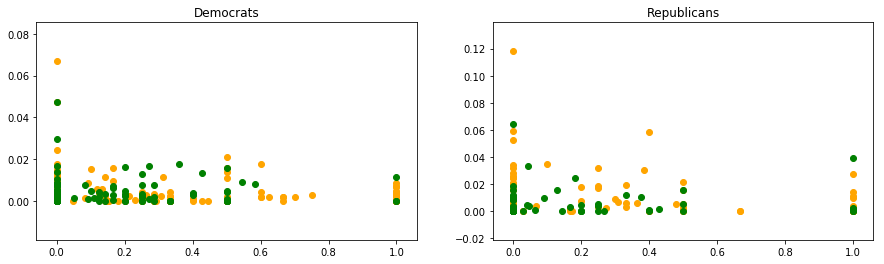

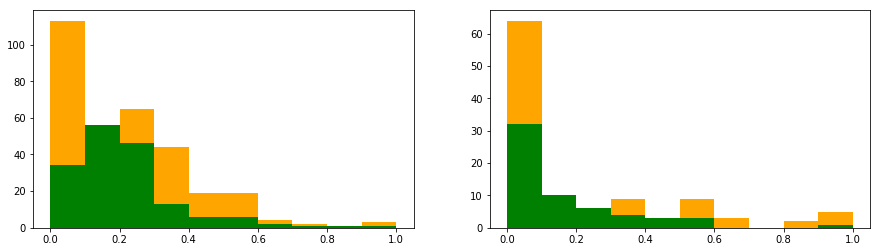

In [99]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['abortion_sentiment'], (lost_primary_dem_df['abortion_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['abortion_sentiment'], (lost_primary_rep_df['abortion_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['abortion_sentiment'], (won_primary_dem_df['abortion_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['abortion_sentiment'], (won_primary_rep_df['abortion_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [100]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-2.5963064004746474, 0.009423199262055551)
sentiment republicans – won vs loss: (-0.5493510187150564, 0.5827645812842591)
sentiment both – won:                (-1.2345273789266913, 0.21700645098273763)
sentiment both – loss:               (0.23614009872486064, 0.8133239593398667)

ratio democrats – won vs loss:       (1.2837725242514062, 0.19922155989584422)
ratio republicans – won vs loss:     (-1.4976580794550174, 0.13422210859368655)
ratio both – won:                    (-2.798212338023542, 0.005138631895619333)
ratio both – loss:                   (-6.5735900296152465, 4.911635207080493e-11)


# Candidate Sentiment vs Number of Immigration Tweets

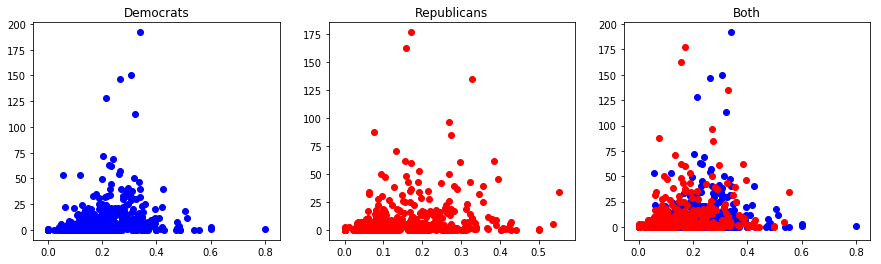

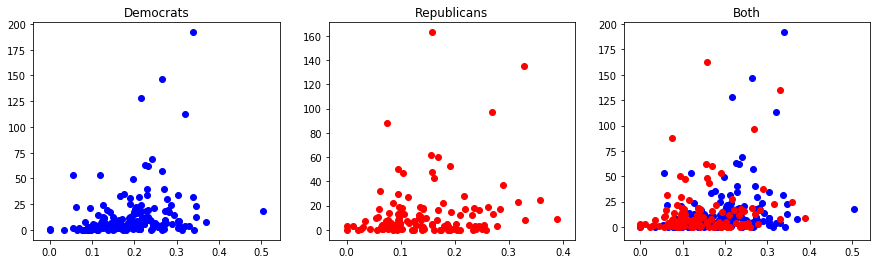

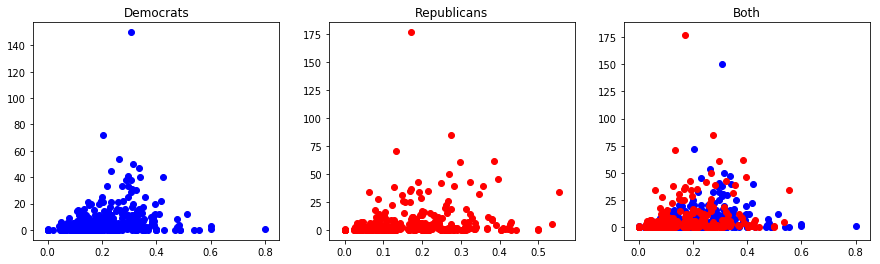

In [101]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['immigration_tweet_count'], rep_df['sentiment'], rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['immigration_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['immigration_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

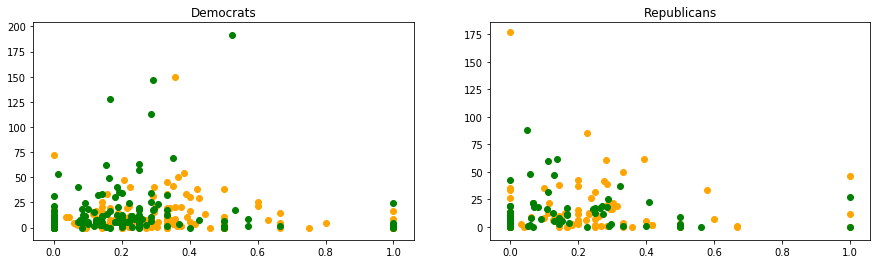

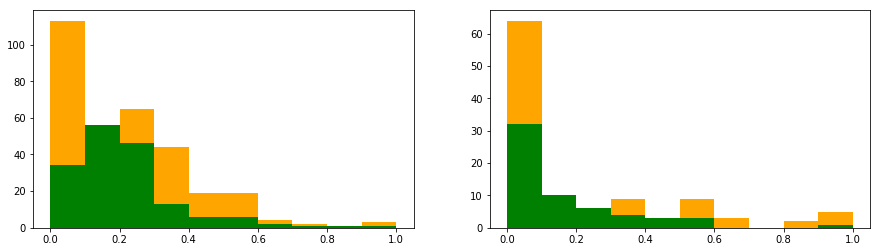

In [102]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['immigration_sentiment'], lost_primary_dem_df['immigration_tweet_count'], lost_primary_rep_df['immigration_sentiment'], lost_primary_rep_df['immigration_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['immigration_sentiment'], won_primary_dem_df['immigration_tweet_count'], won_primary_rep_df['immigration_sentiment'], won_primary_rep_df['immigration_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [103]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-0.8653949497154608, 0.38682205197601915)
sentiment republicans – won vs loss: (0.18853571931468377, 0.8504567175819365)
sentiment both – won:                (1.0749740129092862, 0.2823863632397646)
sentiment both – loss:               (2.378226236136462, 0.01739614907848112)

ratio democrats – won vs loss:       (4.662992254958409, 3.116444863759912e-06)
ratio republicans – won vs loss:     (3.1002045653277026, 0.0019338702943250286)
ratio both – won:                    (-0.21109785677985152, 0.8328109125919105)
ratio both – loss:                   (-1.0921356464682654, 0.2747734833558869)


# Candidate Sentiment vs Number of Kavanaugh Tweets

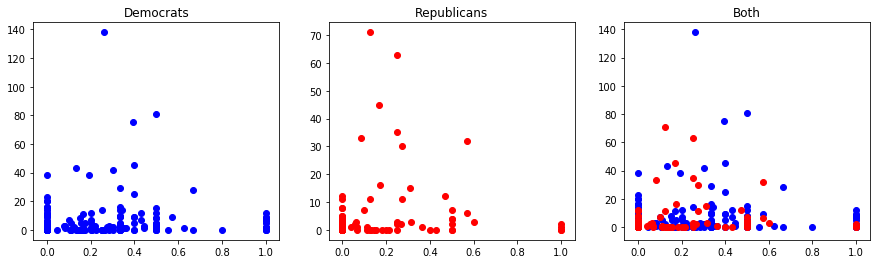

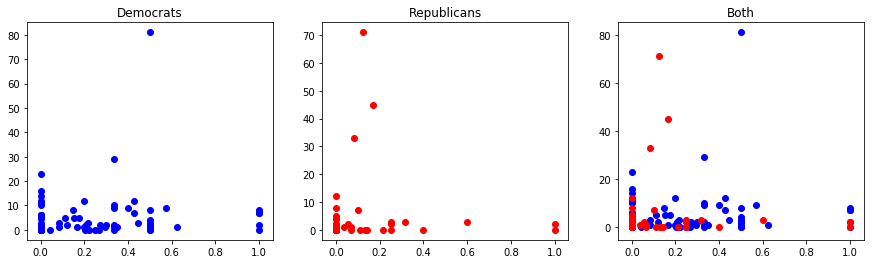

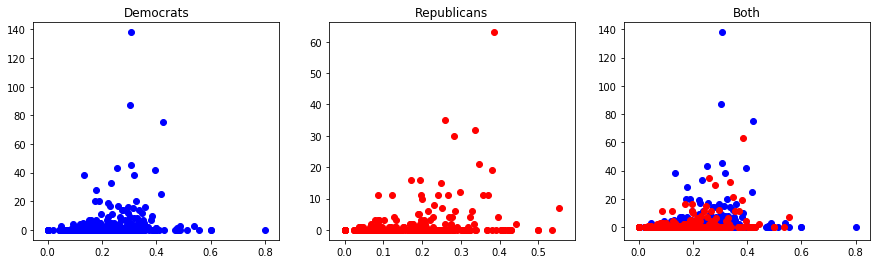

In [104]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['kavanaugh_sentiment'], dem_df['kavanaugh_tweet_count'], rep_df['kavanaugh_sentiment'], rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['kavanaugh_sentiment'], won_primary_dem_df['kavanaugh_tweet_count'], won_primary_rep_df['kavanaugh_sentiment'], won_primary_rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['kavanaugh_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

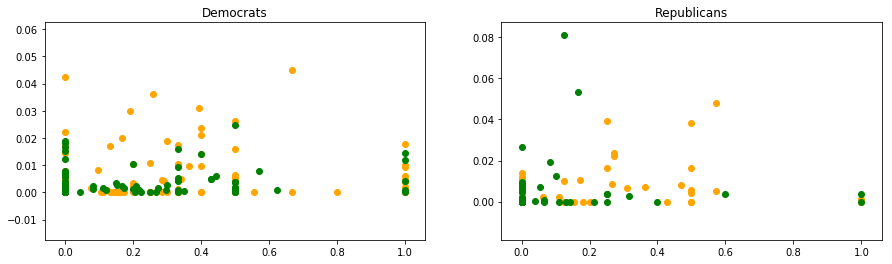

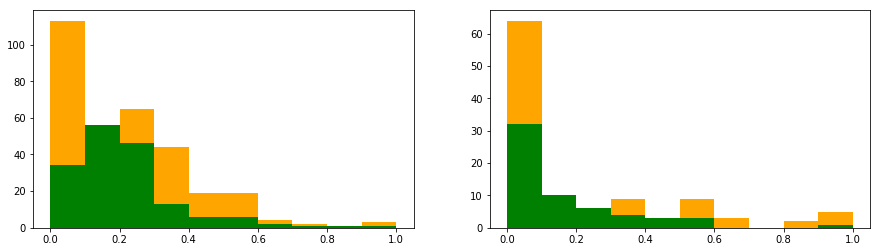

In [105]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['kavanaugh_sentiment'], (lost_primary_dem_df['kavanaugh_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['kavanaugh_sentiment'], (lost_primary_rep_df['kavanaugh_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['kavanaugh_sentiment'], (won_primary_dem_df['kavanaugh_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['kavanaugh_sentiment'], (won_primary_rep_df['kavanaugh_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [106]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-0.0526781061220733, 0.957988383583465)
sentiment republicans – won vs loss: (-0.8004637536740131, 0.4234421559689946)
sentiment both – won:                (1.9094577008124949, 0.05620307340023215)
sentiment both – loss:               (1.358262888325854, 0.17438028172500164)

ratio democrats – won vs loss:       (1.153249391776701, 0.2488080358207917)
ratio republicans – won vs loss:     (2.338853816890581, 0.01934300035803859)
ratio both – won:                    (-2.01830676389078, 0.04355932272016988)
ratio both – loss:                   (-0.364865451978627, 0.7152118443715354)


# Candidate Sentiment vs Number of Education Tweets

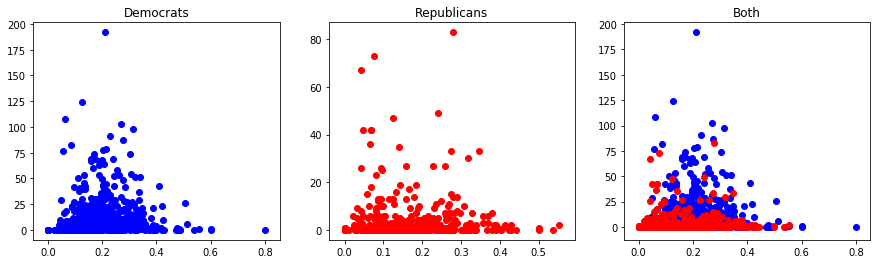

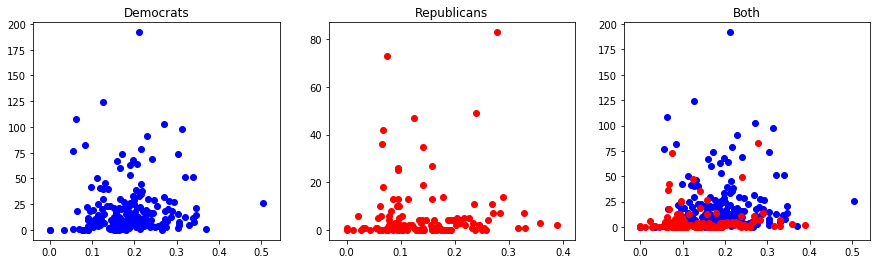

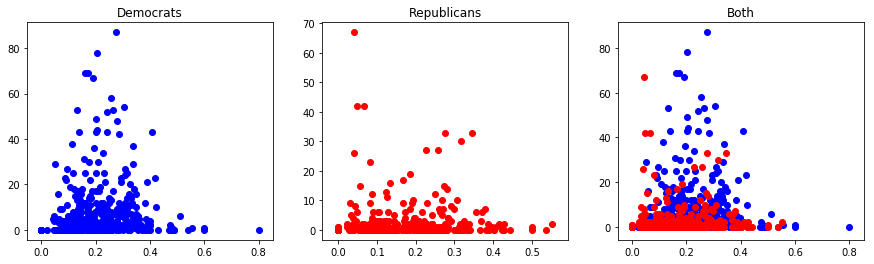

In [107]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['education_tweet_count'], rep_df['sentiment'], rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['education_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['education_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

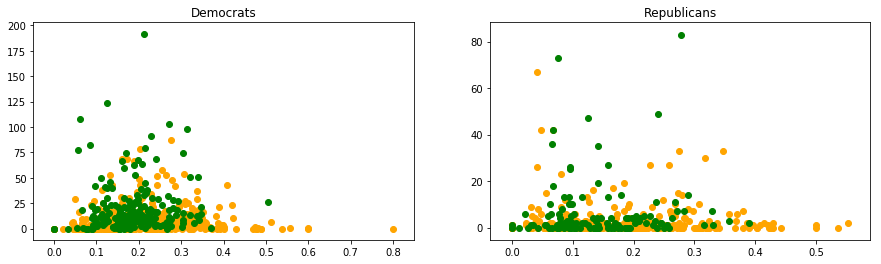

In [108]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['education_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['education_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['education_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['education_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')



# Candidate Sentiment vs Number of Jobs Tweets

NameError: name 'won_primary_dem_df' is not defined

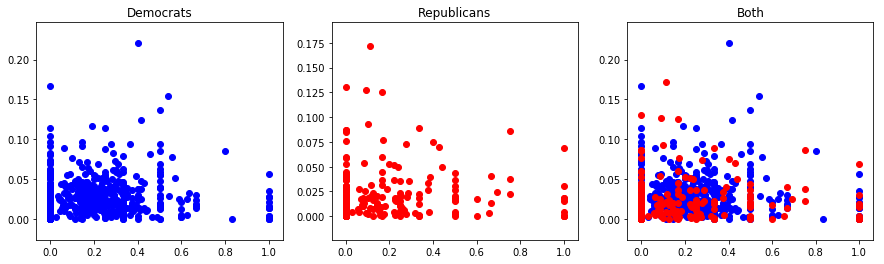

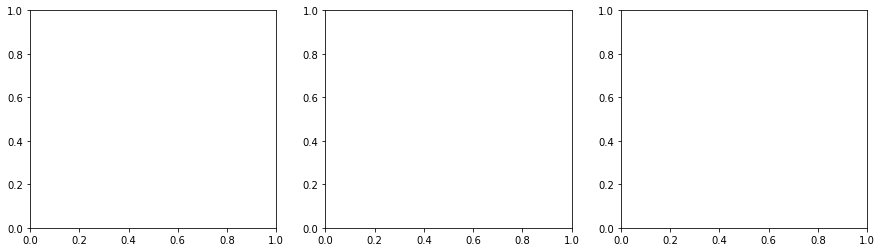

In [122]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['jobs_sentiment'], (dem_df['jobs_tweet_count'] / dem_df['num_tweets']), rep_df['jobs_sentiment'], (rep_df['jobs_tweet_count'] / rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['jobs_sentiment'], (won_primary_dem_df['jobs_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['jobs_sentiment'], (won_primary_rep_df['jobs_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['jobs_sentiment'], (lost_primary_dem_df['jobs_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['jobs_sentiment'], (lost_primary_rep_df['jobs_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

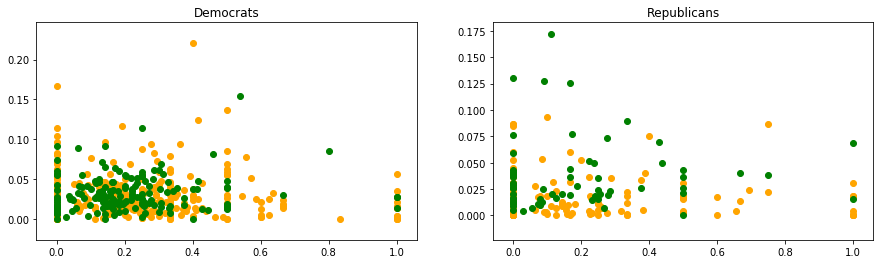

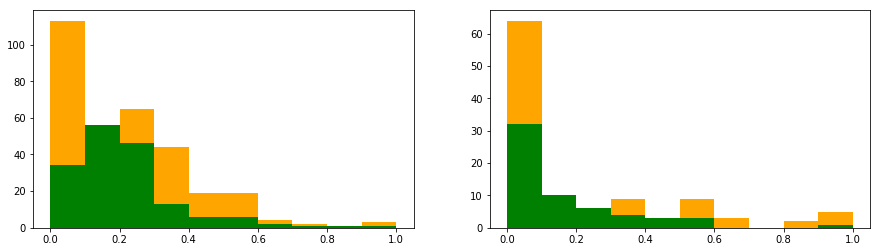

In [110]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['jobs_sentiment'], (lost_primary_dem_df['jobs_tweet_count'] / lost_primary_dem_df['num_tweets']), lost_primary_rep_df['jobs_sentiment'], (lost_primary_rep_df['jobs_tweet_count'] / lost_primary_rep_df['num_tweets'])
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['jobs_sentiment'], (won_primary_dem_df['jobs_tweet_count'] / won_primary_dem_df['num_tweets']), won_primary_rep_df['jobs_sentiment'], (won_primary_rep_df['jobs_tweet_count'] / won_primary_rep_df['num_tweets'])
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [124]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

(array([ 23., 104.,  63., 165., 114., 101.,   0.,   0.,  16.,  14.]),
 array([35626.41463415, 39504.5398374 , 43382.66504065, 47260.7902439 ,
        51138.91544715, 55017.04065041, 58895.16585366, 62773.29105691,
        66651.41626016, 70529.54146341, 74407.66666667]),
 <a list of 10 Patch objects>)

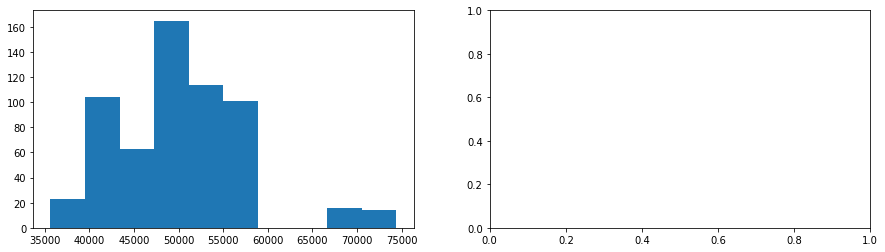

In [142]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(dem_df['median_hh_inc'])
# axs2.hist(rep_df['clf_unemploy_pct'])
# print(rep_df['clf_unemploy_pct'].max())
# print(rep_df['clf_unemploy_pct'].min())

DEMOCRATIC
REPUBLICAN


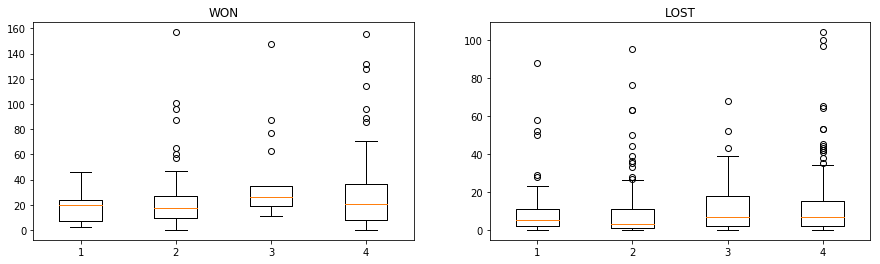

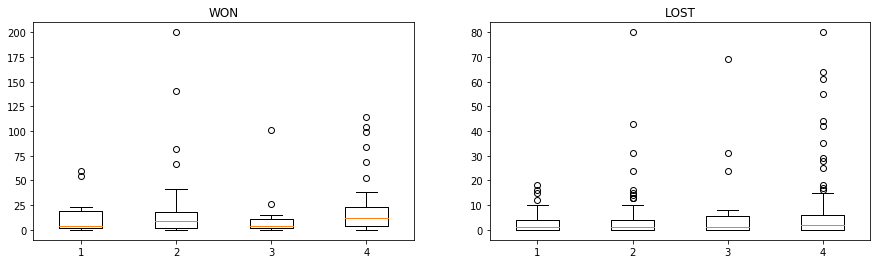

In [141]:
# LOOKing at NUM_TWEETS & AGE 65 and OLDER
def plot_unemploy_jobs_tweet_count(df):
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
    axs1.set_title("WON")
    won_df = df[df['won_primary'] == 'Yes']
    lost_df = df[df['won_primary'] == 'No']
    d14_16 = won_df[(won_df['clf_unemploy_pct'] >= 0) & (won_df['clf_unemploy_pct'] < 6)].jobs_tweet_count
    d16_17 = won_df[(won_df['clf_unemploy_pct'] >= 6) & (won_df['clf_unemploy_pct'] < 7)].jobs_tweet_count
    d17_18 = won_df[(won_df['clf_unemploy_pct'] >= 7) & (won_df['clf_unemploy_pct'] < 8)].jobs_tweet_count
    d18_20 = won_df[(won_df['clf_unemploy_pct'] >= 8)].jobs_tweet_count

    data = [d14_16, d16_17, d17_18, d18_20]
    axs2.set_title("LOST")
    _ = axs1.boxplot(data)
    d14_16 = lost_df[(lost_df['clf_unemploy_pct'] >= 0) & (lost_df['clf_unemploy_pct'] < 6)].jobs_tweet_count
    d16_17 = lost_df[(lost_df['clf_unemploy_pct'] >= 6) & (lost_df['clf_unemploy_pct'] < 7)].jobs_tweet_count
    d17_18 = lost_df[(lost_df['clf_unemploy_pct'] >= 7) & (lost_df['clf_unemploy_pct'] < 8)].jobs_tweet_count
    d18_20 = lost_df[(lost_df['clf_unemploy_pct'] >= 8)].jobs_tweet_count

    data = [d14_16, d16_17, d17_18, d18_20]
    _ = axs2.boxplot(data)

print("DEMOCRATIC")
plot_unemploy_jobs_tweet_count(dem_df)

print("REPUBLICAN")
plot_unemploy_jobs_tweet_count(rep_df)


In [111]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-0.9109588873622899, 0.36231703616578526)
sentiment republicans – won vs loss: (-0.4103669360967819, 0.6815367969340413)
sentiment both – won:                (0.5187853781965205, 0.6039104154998948)
sentiment both – loss:               (0.6724202058546852, 0.501316222911554)

ratio democrats – won vs loss:       (3.739700032964793, 0.000184239984501764)
ratio republicans – won vs loss:     (7.189264889812706, 6.514108630046613e-13)
ratio both – won:                    (-0.07658515895152307, 0.9389535657157901)
ratio both – loss:                   (5.676268177972858, 1.3766490152750958e-08)


# Candidate Sentiment vs Number of Tax Tweets

#### WIP

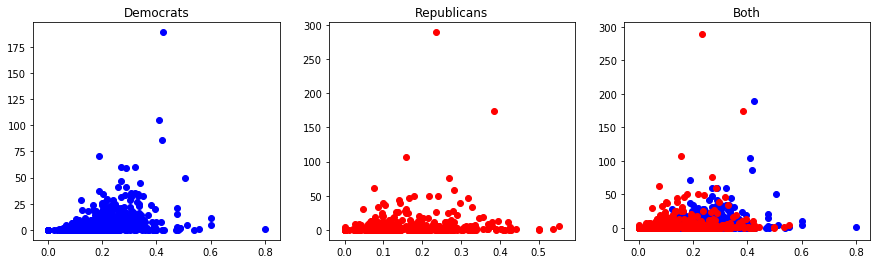

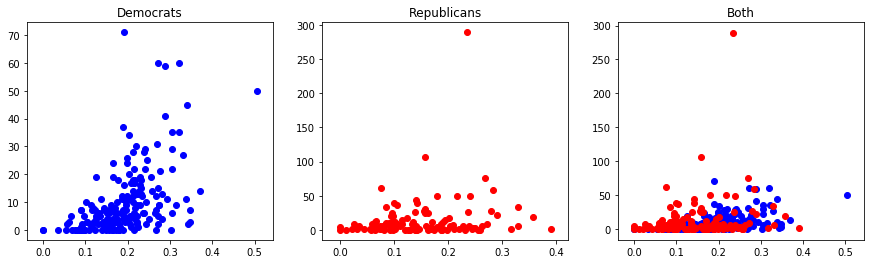

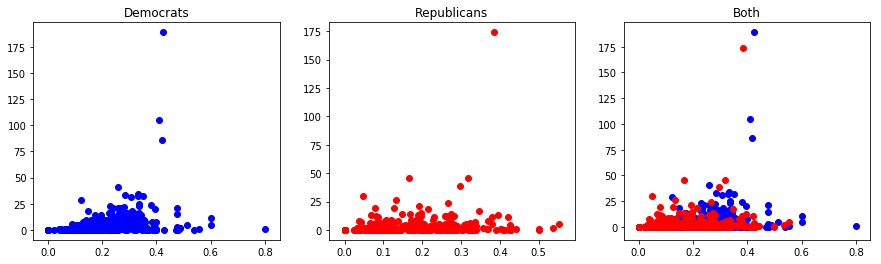

In [112]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['tax_tweet_count'], rep_df['sentiment'], rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['tax_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['tax_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Fake News Tweets

#### WIP

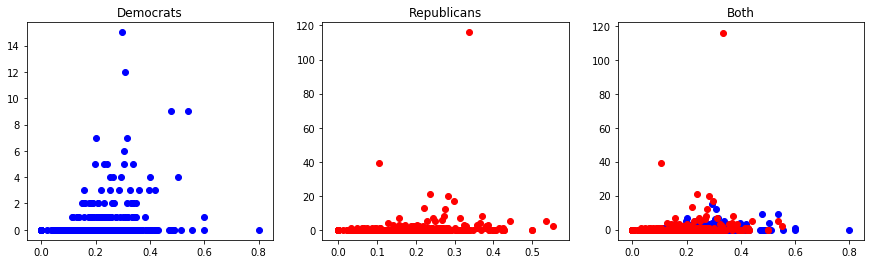

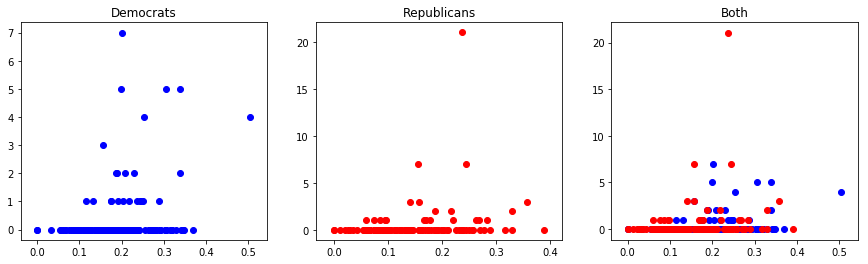

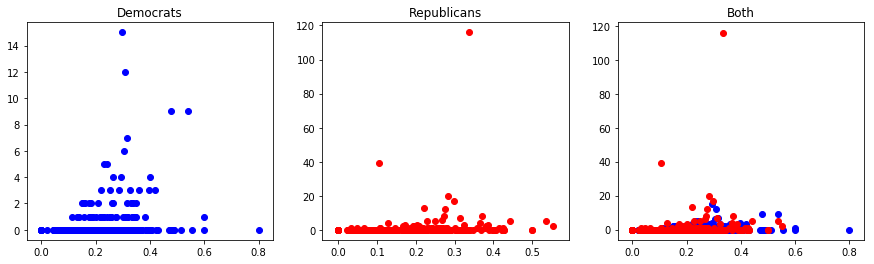

In [113]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['fake_news_tweet_count'], rep_df['sentiment'], rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['fake_news_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['fake_news_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Environment Tweets

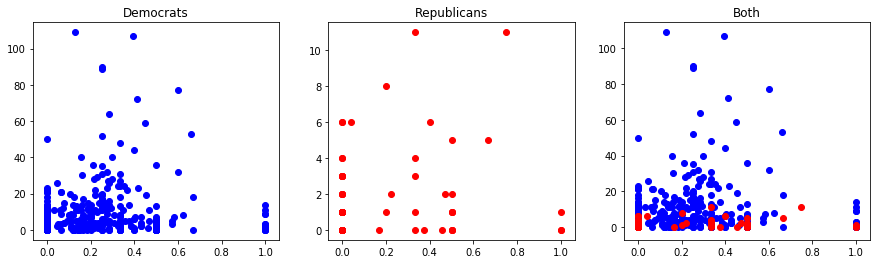

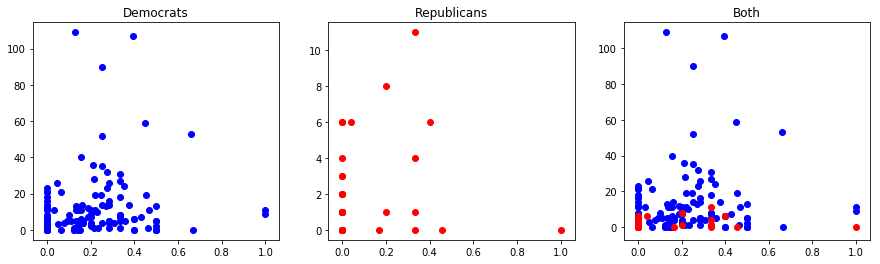

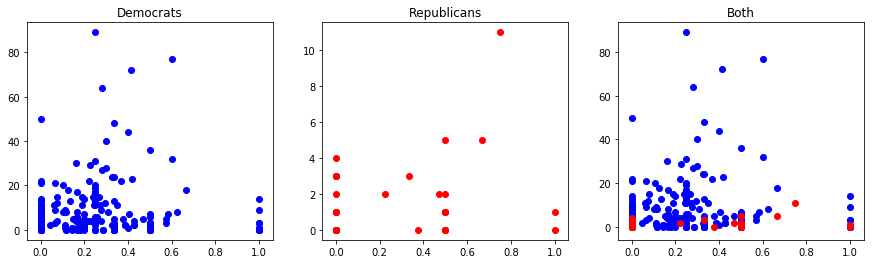

In [114]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['environment_sentiment'], dem_df['environment_tweet_count'], rep_df['environment_sentiment'], rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['environment_sentiment'], won_primary_dem_df['environment_tweet_count'], won_primary_rep_df['environment_sentiment'], won_primary_rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['environment_sentiment'], lost_primary_dem_df['environment_tweet_count'], lost_primary_rep_df['environment_sentiment'], lost_primary_rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

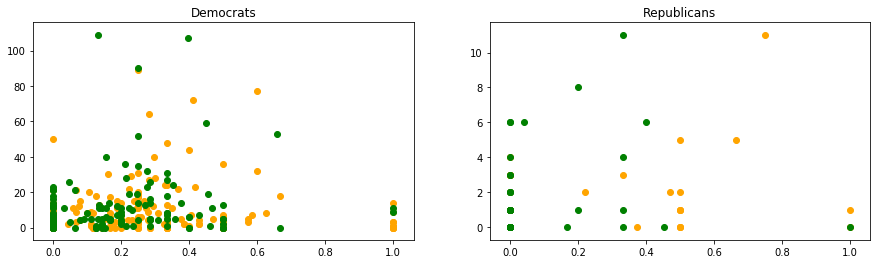

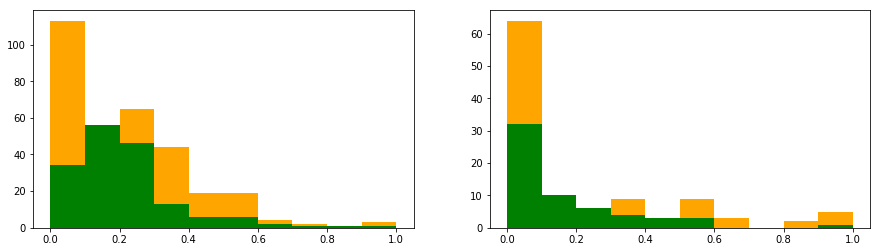

In [115]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['environment_sentiment'], lost_primary_dem_df['environment_tweet_count'], lost_primary_rep_df['environment_sentiment'], lost_primary_rep_df['environment_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['environment_sentiment'], won_primary_dem_df['environment_tweet_count'], won_primary_rep_df['environment_sentiment'], won_primary_rep_df['environment_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [116]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-0.06092756941846917, 0.951416893006609)
sentiment republicans – won vs loss: (-1.5431562474313119, 0.12279287010685344)
sentiment both – won:                (2.080468260526774, 0.037482603917383416)
sentiment both – loss:               (-0.31078492475626157, 0.7559641308743197)

ratio democrats – won vs loss:       (3.378715484721419, 0.0007282533419920406)
ratio republicans – won vs loss:     (1.5411396226202236, 0.12328280830722022)
ratio both – won:                    (5.751297287438304, 8.856122551239375e-09)
ratio both – loss:                   (8.098150310082255, 5.580109797088954e-16)


# Candidate Sentiment vs Number of Sexual Assault Tweets

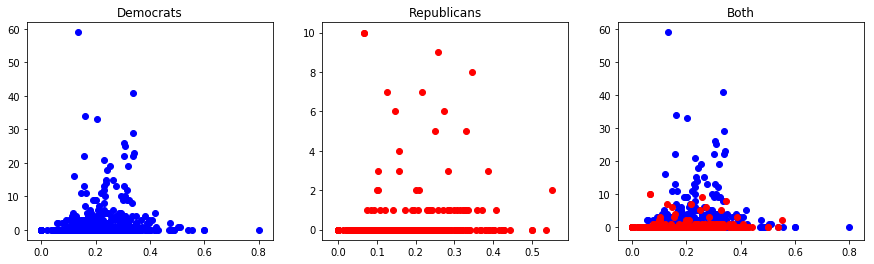

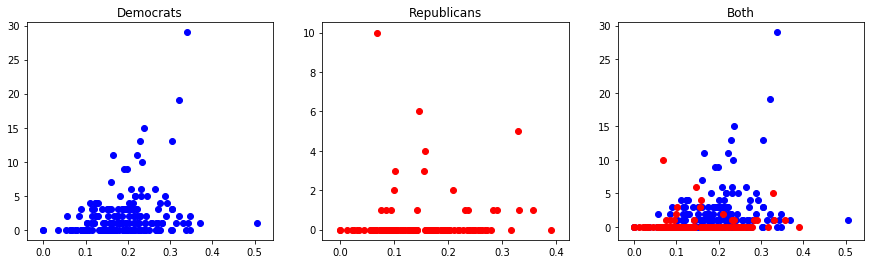

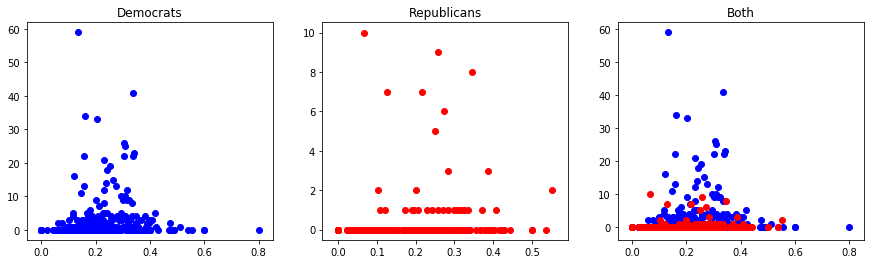

In [117]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['sexual_assault_tweet_count'], rep_df['sentiment'], rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['sexual_assault_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['sexual_assault_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

DEMS
LOSS: 38 / 399 = 0.09523809523809523
WIN: 20 / 188 = 0.10638297872340426

REPS
LOSS: 7 / 287 = 0.024390243902439025
WIN: 3 / 124 = 0.024193548387096774


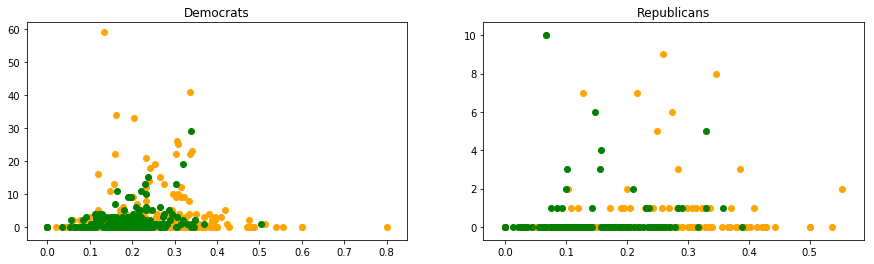

In [118]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['sexual_assault_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['sexual_assault_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['sexual_assault_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['sexual_assault_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

cutoff = 5
start = 0
print("DEMS")
print("LOSS: " + str(len(l_d2[l_d2 >= cutoff])) + " / " + str(len(l_d2[l_d2 >= start])) + " = " + str((len(l_d2[l_d2 >= cutoff]) / len(l_d2[l_d2 >= start]))))
print("WIN: " + str(len(w_d2[w_d2 >= cutoff])) + " / " + str(len(w_d2[w_d2 >= start])) + " = " + str((len(w_d2[w_d2 >= cutoff]) / len(w_d2[w_d2 >= start]))))

print()

print("REPS")
print("LOSS: " + str(len(l_r2[l_r2 >= cutoff])) + " / " + str(len(l_r2[l_r2 >= start])) + " = " + str((len(l_r2[l_r2 >= cutoff]) / len(l_r2[l_r2 >= start]))))
print("WIN: " + str(len(w_r2[w_r2 >= cutoff])) + " / " + str(len(w_r2[w_r2 >= start])) + " = " + str((len(w_r2[w_r2 >= cutoff]) / len(w_r2[w_r2 >= start]))))



# Candidate Sentiment vs Number of Gender Tweets

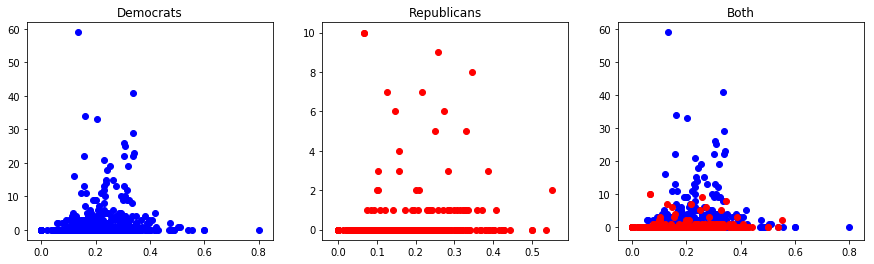

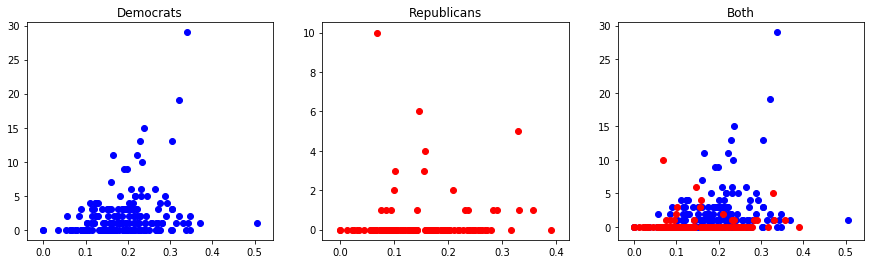

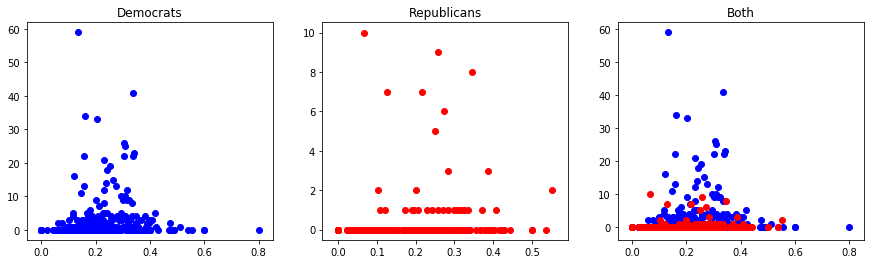

In [119]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['gender_tweet_count'], rep_df['sentiment'], rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['gender_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['gender_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

DEMS
LOSS: 204 / 399 = 0.5112781954887218
WIN: 120 / 188 = 0.6382978723404256

REPS
LOSS: 127 / 287 = 0.4425087108013937
WIN: 62 / 124 = 0.5


(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

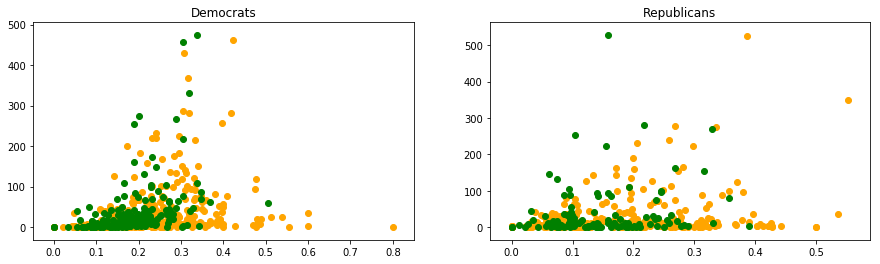

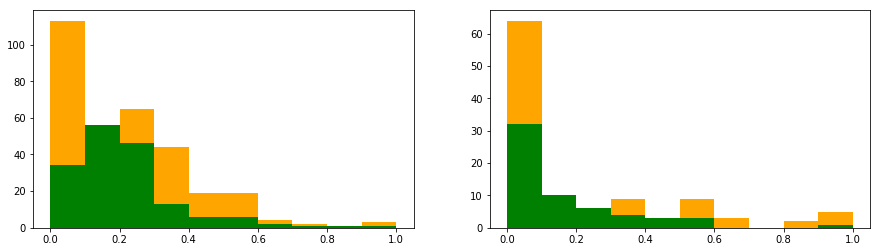

In [120]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['trump_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['trump_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['trump_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['trump_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

cutoff = 10
start = 0
print("DEMS")
print("LOSS: " + str(len(l_d2[l_d2 >= cutoff])) + " / " + str(len(l_d2[l_d2 >= start])) + " = " + str((len(l_d2[l_d2 >= cutoff]) / len(l_d2[l_d2 >= start]))))
print("WIN: " + str(len(w_d2[w_d2 >= cutoff])) + " / " + str(len(w_d2[w_d2 >= start])) + " = " + str((len(w_d2[w_d2 >= cutoff]) / len(w_d2[w_d2 >= start]))))

print()

print("REPS")
print("LOSS: " + str(len(l_r2[l_r2 >= cutoff])) + " / " + str(len(l_r2[l_r2 >= start])) + " = " + str((len(l_r2[l_r2 >= cutoff]) / len(l_r2[l_r2 >= start]))))
print("WIN: " + str(len(w_r2[w_r2 >= cutoff])) + " / " + str(len(w_r2[w_r2 >= start])) + " = " + str((len(w_r2[w_r2 >= cutoff]) / len(w_r2[w_r2 >= start]))))


fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')



# Candidate Sentiment vs Number of Women Tweets

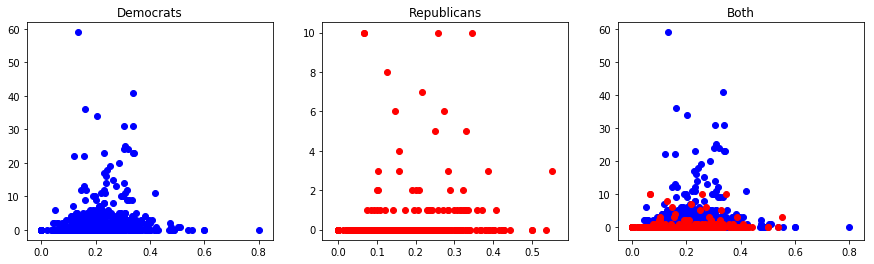

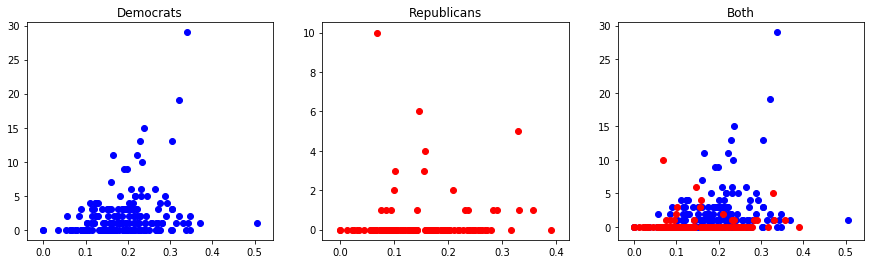

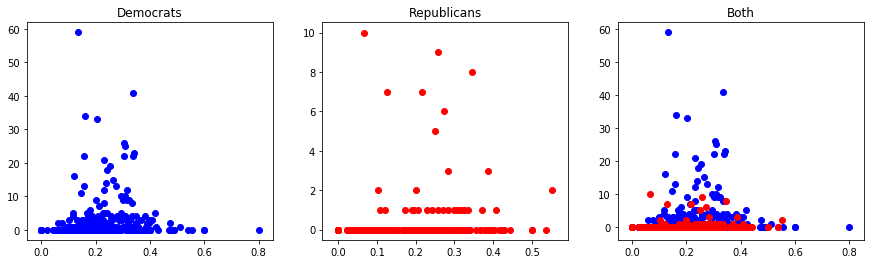

In [121]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['women_tweet_count'], rep_df['sentiment'], rep_df['women_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['gender_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['gender_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of LGBT Tweets

#### WIP

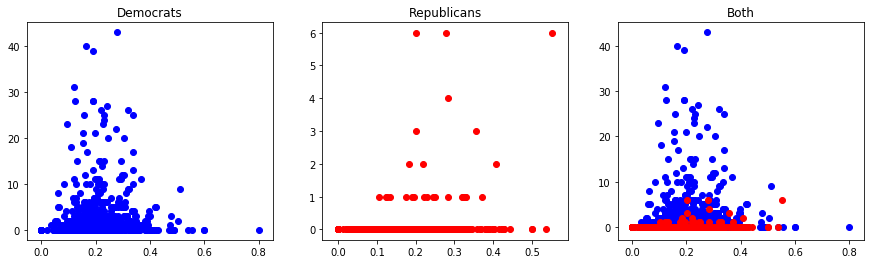

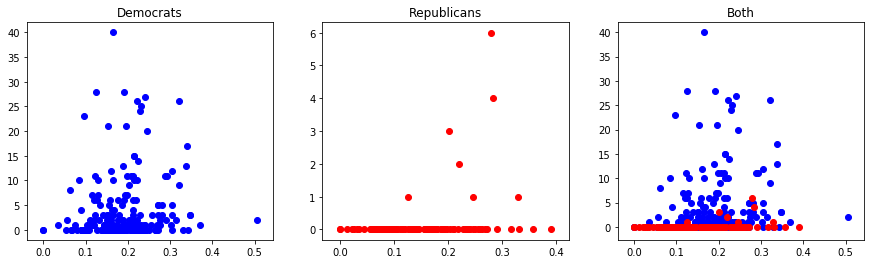

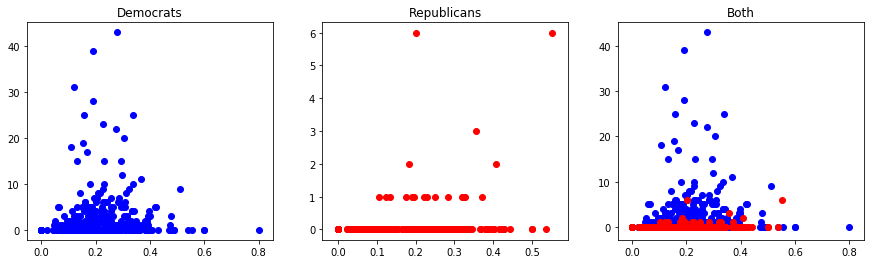

In [122]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['lgbt_tweet_count'], rep_df['sentiment'], rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['lgbt_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['lgbt_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Freedom Tweets

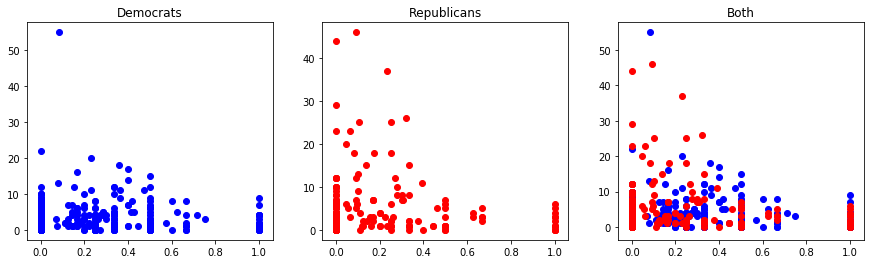

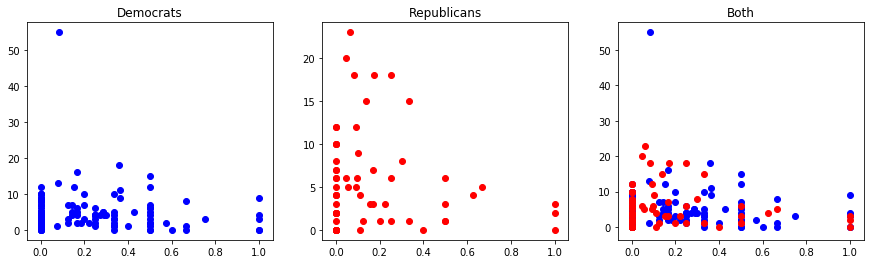

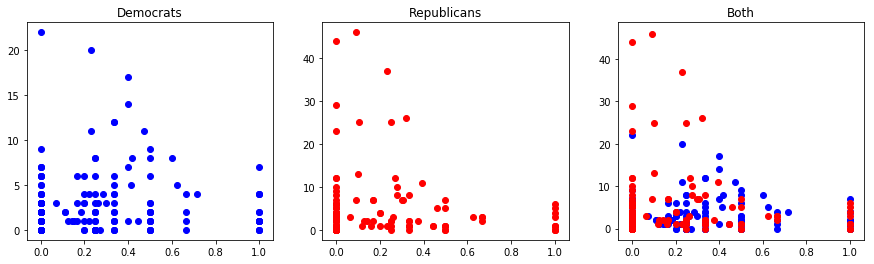

In [123]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['freedom_sentiment'], dem_df['freedom_tweet_count'], rep_df['freedom_sentiment'], rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['freedom_sentiment'], won_primary_dem_df['freedom_tweet_count'], won_primary_rep_df['freedom_sentiment'], won_primary_rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['freedom_sentiment'], lost_primary_dem_df['freedom_tweet_count'], lost_primary_rep_df['freedom_sentiment'], lost_primary_rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

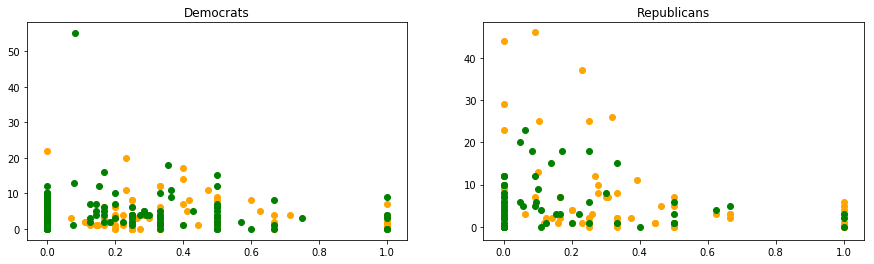

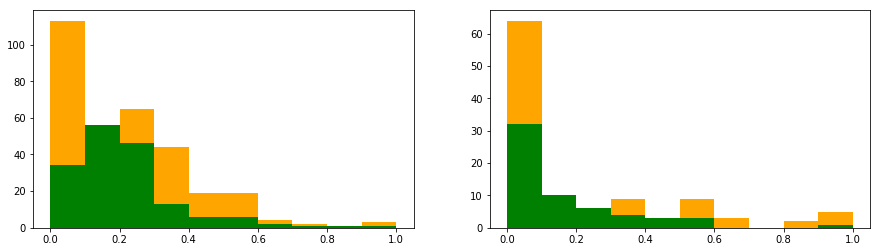

In [124]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['freedom_sentiment'], lost_primary_dem_df['freedom_tweet_count'], lost_primary_rep_df['freedom_sentiment'], lost_primary_rep_df['freedom_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['freedom_sentiment'], won_primary_dem_df['freedom_tweet_count'], won_primary_rep_df['freedom_sentiment'], won_primary_rep_df['freedom_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [125]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-0.9938130332995312, 0.32031389972408597)
sentiment republicans – won vs loss: (-0.926745735985677, 0.35405856507164113)
sentiment both – won:                (0.9872608658855575, 0.32351477017015295)
sentiment both – loss:               (0.8868508698485014, 0.37515919567236)

ratio democrats – won vs loss:       (6.420356641761355, 1.3595545023725997e-10)
ratio republicans – won vs loss:     (1.1233801538085997, 0.2612760749449524)
ratio both – won:                    (-1.4261174458039907, 0.15383444378961747)
ratio both – loss:                   (-4.107231169410437, 4.004304142035009e-05)


# Candidate Sentiment vs Number of Trump Tweets

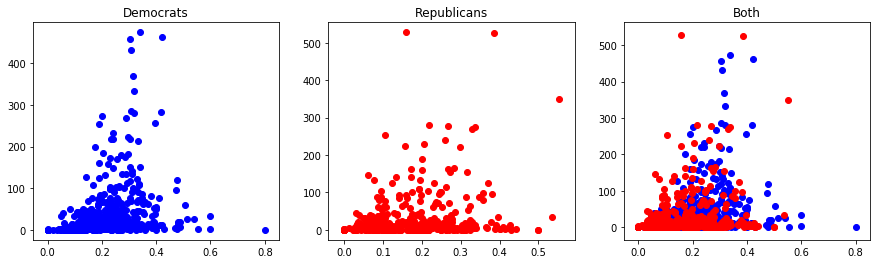

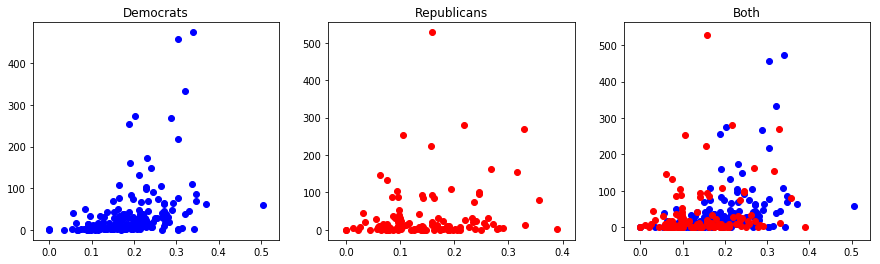

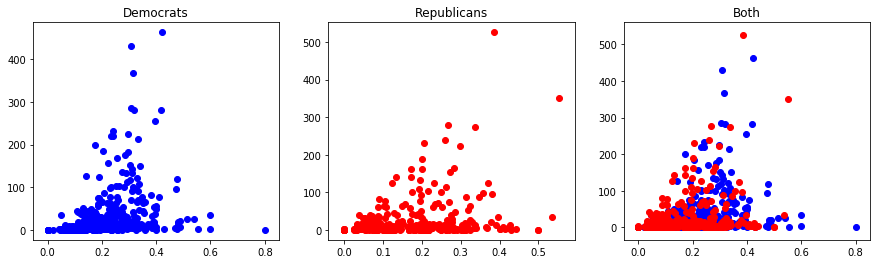

In [126]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['trump_tweet_count'], rep_df['sentiment'], rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['trump_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['trump_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

(array([32., 10.,  6.,  4.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

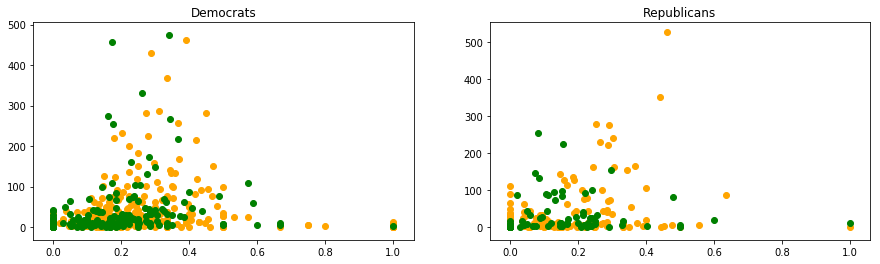

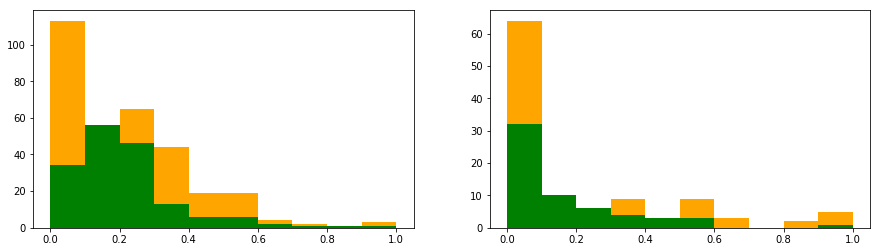

In [127]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.set_title("Democrats")
axs2.set_title("Republicans")

l_d1, l_d2, l_r1, l_r2 = lost_primary_dem_df['trump_sentiment'], lost_primary_dem_df['trump_tweet_count'], lost_primary_rep_df['trump_sentiment'], lost_primary_rep_df['trump_tweet_count']
axs1.scatter(l_d1, l_d2, c='orange')
axs2.scatter(l_r1, l_r2, c='orange')

w_d1, w_d2, w_r1, w_r2 = won_primary_dem_df['trump_sentiment'], won_primary_dem_df['trump_tweet_count'], won_primary_rep_df['trump_sentiment'], won_primary_rep_df['trump_tweet_count']
axs1.scatter(w_d1, w_d2, c='green')
axs2.scatter(w_r1, w_r2, c='green')

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
axs1.hist(ld_d1, color='orange')
axs2.hist(lr_r1, color='orange')
axs1.hist(wd_d1, color='green')
axs2.hist(wr_r1, color='green')


In [128]:
l_d1 = l_d1.dropna()
l_r1 = l_r1.dropna()
w_d1 = w_d1.dropna()
w_r1 = w_r1.dropna()

print("sentiment democrats – won vs loss:   " + str(stats.ztest(w_d1, l_d1, alternative="two-sided")))
print("sentiment republicans – won vs loss: " + str(stats.ztest(w_r1, l_r1, alternative="two-sided")))

print("sentiment both – won:                " + str(stats.ztest(w_d1, w_r1, alternative="two-sided")))
print("sentiment both – loss:               " + str(stats.ztest(l_d1, l_r1, alternative="two-sided")))

print()

l_d2 = l_d2.dropna()
l_r2 = l_r2.dropna()
w_d2 = w_d2.dropna()
w_r2 = w_r2.dropna()

print("ratio democrats – won vs loss:       " + str(stats.ztest(w_d2, l_d2, alternative="two-sided")))
print("ratio republicans – won vs loss:     " + str(stats.ztest(w_r2, l_r2, alternative="two-sided")))

print("ratio both – won:                    " + str(stats.ztest(w_d2, w_r2, alternative="two-sided")))
print("ratio both – loss:                   " + str(stats.ztest(l_d2, l_r2, alternative="two-sided")))


sentiment democrats – won vs loss:   (-1.1138432169785157, 0.2653464530483024)
sentiment republicans – won vs loss: (0.2190350923566534, 0.8266227116807634)
sentiment both – won:                (2.1404007906456584, 0.03232239069227158)
sentiment both – loss:               (3.9432224650313614, 8.039401582505283e-05)

ratio democrats – won vs loss:       (0.8521577074695811, 0.3941265664547109)
ratio republicans – won vs loss:     (1.062753318862287, 0.28789383412815905)
ratio both – won:                    (0.2802778434461249, 0.7792643481943081)
ratio both – loss:                   (1.0174626074951154, 0.30893341174731304)
